In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_state_city, plot_bloch_multivector, plot_state_paulivec, plot_state_hinton, plot_state_qsphere
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'1 1 1': 243, '1 0 0': 255, '1 1 0': 260, '1 0 1': 266}


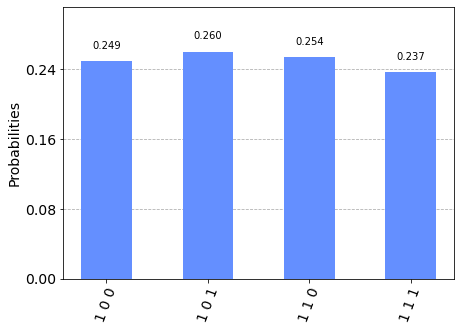

In [4]:
q = QuantumRegister(3)
c0 = ClassicalRegister(1, "c0")
c1 = ClassicalRegister(1, "c1")
c2 = ClassicalRegister(1, "c2")
qc = QuantumCircuit(q, c0, c1, c2, name="test1")

qc.h(q[0])
qc.h(q[1])
qc.x(q[2])

#qc.x(q[2]) = HZH |q[2]>
#qc.h(q[2])
#qc.x(q[2])
#qc.h(q[2])

# oracle function - f(x) = x0+x1x2
qc.h(q[0])
qc.cx(q[1],q[0])
qc.h(q[0])

#qc.z(q[2]) # phase-flip
#----------------

qc.h(q[0])
qc.h(q[1])
#qc.h(q[2])

qc.measure(q[0], c0[0])
qc.measure(q[1], c1[0])
qc.measure(q[2], c2[0])

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)# execute the quantum circuit
print(counts)
# Run in interactive mode
#iplot_histogram(counts)

plot_histogram(counts)

#psi  = result.get_statevector(qc)
#plot_state_hinton(psi)

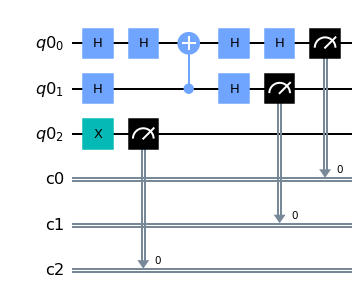

In [5]:
qc.draw(output='mpl')

In [ ]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

In [ ]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_athens')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [ ]:
result_exp = job_exp.result()
print(result_exp)

In [ ]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [ ]:
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))